In [17]:
import re
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import json
import os
from calendar import monthrange
import pymysql
import sys 
import requests
import matplotlib.pyplot as plt
from elasticsearch.helpers import scan
import seaborn as sns 

#### Customer Demographic 

In [2]:
df=pd.read_excel('C:/Users/PC/Downloads/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerDemographic',header=1)
df

C:\Users\PC\AppData\Local\Temp\ipykernel_17620\2685610194.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df=pd.read_excel('C:/Users/PC/Downloads/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerDemographic',header=1)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [9]:
df[df.duplicated()].sum()

C:\Users\PC\AppData\Local\Temp\ipykernel_17620\482248120.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df.duplicated()].sum()


customer_id                            0.0
first_name                             0.0
last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
default                                0.0
owns_car                               0.0
tenure                                 0.0
dtype: float64

In [10]:
df.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

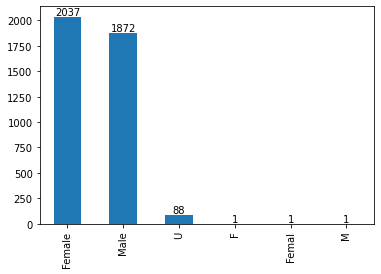

In [12]:
ax=df['gender'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i)

In [14]:
df['past_3_years_bike_related_purchases'].describe()

count    4000.000000
mean       48.890000
std        28.715005
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

<AxesSubplot:>

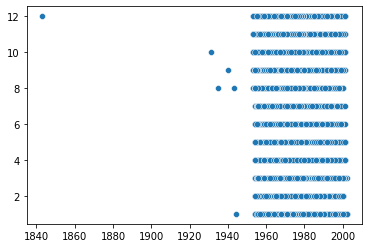

In [19]:
sns.scatterplot(x=[d.year for d in df['DOB']],y=[d.month for d in df['DOB']])

In [25]:
df['job_title'].unique()

array(['Executive Secretary', 'Administrative Officer',
       'Recruiting Manager', nan, 'Senior Editor', 'Media Manager I',
       'Business Systems Development Analyst', 'Senior Quality Engineer',
       'Nuclear Power Engineer', 'Developer I', 'Account Executive',
       'Junior Executive', 'Media Manager IV', 'Sales Associate',
       'Professor', 'Geological Engineer', 'Project Manager',
       'Safety Technician I', 'Research Assistant I',
       'Accounting Assistant III', 'Editor', 'Research Nurse',
       'Safety Technician III', 'Staff Accountant III', 'Legal Assistant',
       'Product Engineer', 'Information Systems Manager',
       'VP Quality Control', 'Social Worker', 'Senior Cost Accountant',
       'Assistant Media Planner', 'Payment Adjustment Coordinator',
       'Food Chemist', 'Accountant III', 'Director of Sales',
       'Senior Financial Analyst', 'Registered Nurse',
       'Biostatistician II', 'Computer Systems Analyst II',
       'Software Test Engineer II', 

In [28]:
df['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

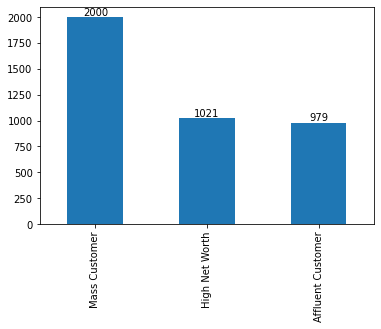

In [29]:
ax=df['wealth_segment'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i)

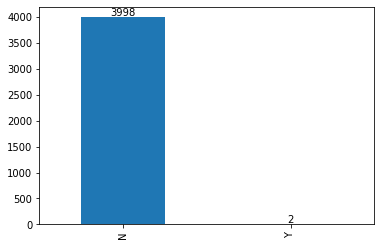

In [30]:
ax=df['deceased_indicator'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i)

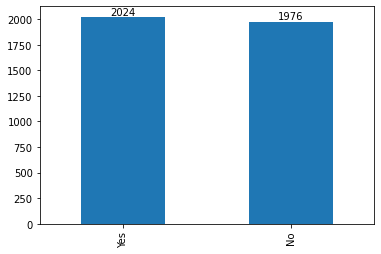

In [31]:
ax=df['owns_car'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i)

In [33]:
df['tenure'].describe()

count    3913.000000
mean       10.657041
std         5.660146
min         1.000000
25%         6.000000
50%        11.000000
75%        15.000000
max        22.000000
Name: tenure, dtype: float64

#### CustomerAddress

In [34]:
df2=pd.read_excel('C:/Users/PC/Downloads/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerAddress',header=1)
df2 

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [37]:
df2[df2.duplicated()].sum()

customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64

In [38]:
df2.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

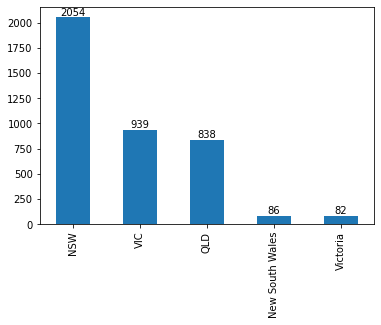

In [40]:
state=df2['state'].value_counts().plot.bar()
for i in state.containers:
    state.bar_label(i)

In [41]:
df2['country'].unique()

array(['Australia'], dtype=object)

(array([297., 186., 214., 225., 238., 493., 646., 647., 577., 476.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

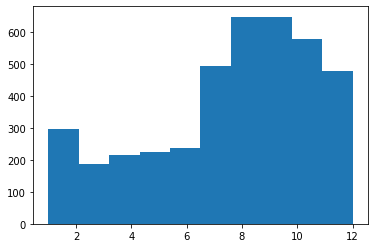

In [45]:
plt.hist(df2['property_valuation'])

#### Transactions 

In [46]:
df3=pd.read_excel('C:/Users/PC/Downloads/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='Transactions',header=1)
df3

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [47]:
df3[df3.duplicated()].sum()

C:\Users\PC\AppData\Local\Temp\ipykernel_17620\2331071890.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3[df3.duplicated()].sum()


transaction_id             0.0
product_id                 0.0
customer_id                0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

In [48]:
df3.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

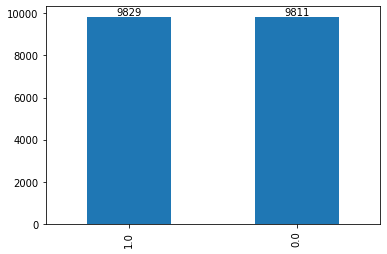

In [51]:
ax=df3['online_order'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i)

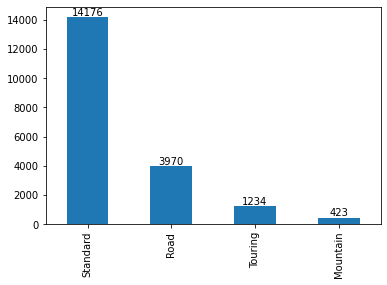

In [52]:
ax=df3['product_line'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i)

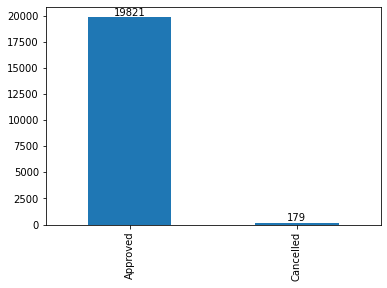

In [53]:
ax=df3['order_status'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i)

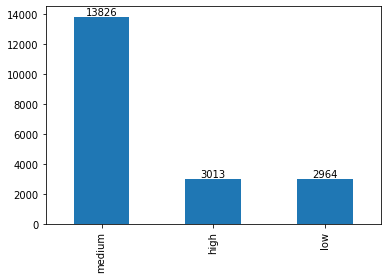

In [59]:
ax=df3['product_class'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i)

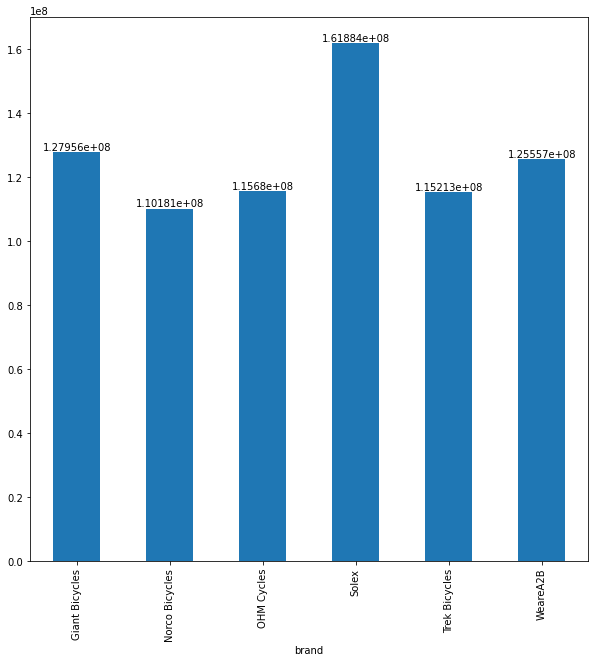

In [57]:
ax=df3.groupby('brand')['product_first_sold_date'].sum().plot.bar(figsize=(10,10))
for i in ax.containers:
    ax.bar_label(i)